<a href="https://colab.research.google.com/github/ThazSobral/ThazSobral.github.io/blob/master/enem_analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center"><img src="https://upload.wikimedia.org/wikipedia/pt/8/80/Enem_logo.png?1591314294326" /></p>

# Análise de dados do ENEM

## Import libraries

In [0]:
import pandas as pd
import matplotlib

## Import Dataframe

**Repositório**: [enem-analyse](https://github.com/ThazSobral/enem-analyse)
O repositório utilizado é um recorte, pois o intuito desse notebook é apenas didático

In [2]:
uri = 'https://raw.githubusercontent.com/ThazSobral/enem-analyse/master/recorte-primeiros-1000.csv'
data_enem = pd.read_csv(uri, sep=';', encoding='ISO-8859-1')
data_enem.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,"1,80008E+11",2018,5300108,Brasília,53,DF,44,M,1.0,1,0,NaN,NaN,NaN,NaN,2,0,2,1.0,0,52033333.0,5208707.0,Goiânia,52.0,GO,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,A,A,A,1,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A
1,"1,80007E+11",2018,2111102,São João dos Patos,21,MA,23,F,0.0,3,1,2111102.0,São João dos Patos,21.0,MA,1,5,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CACBEEDBDDAEAEDDABAAEEAEAEEABAEDAAAACEAABADAA,0,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,1.0,120.0,40.0,40.0,60.0,20.0,280.0,B,B,A,A,4,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,A
2,"1,80009E+11",2018,3530607,Mogi das Cruzes,35,SP,23,F,0.0,1,1,4209300.0,Lages,42.0,SC,1,3,1,3.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,C,B,4,C,A,B,C,B,A,B,A,B,A,B,A,A,B,A,A,B,B,B,B,A,A
3,"1,80008E+11",2018,2916401,Itapetinga,29,BA,26,F,0.0,3,2,NaN,NaN,NaN,NaN,1,8,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,4,B,A,B,C,A,A,B,A,A,A,B,A,A,B,B,A,C,A,B,B,A,A
4,"1,80009E+11",2018,2918100,Jeremoabo,29,BA,20,M,0.0,0,1,2800308.0,Aracaju,28.0,SE,2,0,2,1.0,0,29112699.0,2918100.0,Jeremoabo,29.0,BA,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,NaN,1.0,140.0,40.0,40.0,120.0,20.0,360.0,C,E,A,D,3,B,A,B,C,A,B,B,A,A,A,A,A,A,B,A,A,B,A,B,B,B,A


## Exploratory Analysis

Visualizando colunas do dataframe

In [0]:
data_enem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

Filtrando colunas

In [0]:
selected_columns = ['NO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24', 'IN_AMPLIADA_18',
       'IN_LEDOR', 'IN_ACESSO', 'IN_TRANSCRICAO', 'IN_LIBRAS',
       'IN_LEITURA_LABIAL', 'IN_MESA_CADEIRA_RODAS',
       'IN_MESA_CADEIRA_SEPARADA', 'IN_APOIO_PERNA', 'IN_GUIA_INTERPRETE',
       'IN_COMPUTADOR', 'IN_CADEIRA_ESPECIAL', 'IN_CADEIRA_CANHOTO',
       'IN_CADEIRA_ACOLCHOADA', 'IN_PROVA_DEITADO', 'IN_MOBILIARIO_OBESO',
       'IN_LAMINA_OVERLAY', 'IN_PROTETOR_AURICULAR', 'IN_MEDIDOR_GLICOSE',
       'IN_MAQUINA_BRAILE', 'IN_SOROBAN', 'IN_MARCA_PASSO', 'IN_SONDA',
       'IN_MEDICAMENTOS', 'IN_SALA_INDIVIDUAL', 'IN_SALA_ESPECIAL',
       'IN_SALA_ACOMPANHANTE', 'IN_MOBILIARIO_ESPECIFICO']

selected_data_enem = data_enem.filter(items = selected_columns)
selected_data_enem.head()

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,SG_UF_NASCIMENTO,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO
0,Brasília,DF,44,M,1.0,1,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,São João dos Patos,MA,23,F,0.0,3,1,2111102.0,MA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Mogi das Cruzes,SP,23,F,0.0,1,1,4209300.0,SC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Itapetinga,BA,26,F,0.0,3,2,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Jeremoabo,BA,20,M,0.0,0,1,2800308.0,SE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### County

Analisando a coluna NO_MUNICIPIO_RESIDENCIA

In [0]:
column_no_municipio_residencia = selected_data_enem['NO_MUNICIPIO_RESIDENCIA']
column_no_municipio_residencia

0                Brasília
1      São João dos Patos
2         Mogi das Cruzes
3              Itapetinga
4               Jeremoabo
              ...        
994              São Luís
995                Ubaíra
996          Juiz de Fora
997              Brasília
998                Cacoal
Name: NO_MUNICIPIO_RESIDENCIA, Length: 999, dtype: object

Verificando a distribuição de alunos por munícipio

In [0]:
column_no_municipio_residencia.value_counts().sort_index()

Abadia de Goiás        1
Abaetetuba             2
Acará                  1
Alagoinhas             3
Almirante Tamandaré    3
                      ..
Várzea Grande          2
Várzea da Palma        1
Xambioá                1
Xique-Xique            1
Água Branca            1
Name: NO_MUNICIPIO_RESIDENCIA, Length: 485, dtype: int64

### AGE

Analisando a coluna NU_IDADE

Verificando a distribuição de alunos por idade

In [0]:
column_nu_idade = selected_data_enem['NU_IDADE']
column_nu_idade.value_counts().sort_index()

15      3
16     11
17     85
18    120
19    107
20     87
21     76
22     44
23     52
24     48
25     44
26     27
27     31
28     19
29     37
30     20
31     17
32     23
33     14
34     19
35     18
36      9
37     12
38     11
39     14
40      9
41     10
42      5
43      4
44      4
45      2
46      4
47      4
48      2
53      1
54      1
56      3
57      1
59      1
Name: NU_IDADE, dtype: int64

Gerando um histograma dos dados de idade

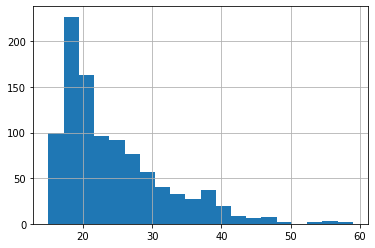

In [0]:
column_nu_idade.hist(bins=20)

### Residences

Analisando a coluna SG_UF_RESIDENCIA

Verificando distribuição de residencias

In [0]:
column_sg_uf_residencia = selected_data_enem['SG_UF_RESIDENCIA']
column_sg_uf_residencia.value_counts().sort_index()

AC      3
AL     12
AM     22
AP     11
BA     87
CE     71
DF     28
ES     22
GO     32
MA     42
MG     93
MS     21
MT     27
PA     39
PB     23
PE     59
PI     26
PR     41
RJ     53
RN     20
RO     16
RR      6
RS     39
SC     18
SE     13
SP    163
TO     12
Name: SG_UF_RESIDENCIA, dtype: int64

### Qual gênero mais fez o ENEM em 2018?

Verificando quantos de cada gênero fizeram o ENEM em 2018 dentro do dataframe

In [0]:
selected_columns_tp_sexo = selected_data_enem['TP_SEXO']
dist_tp_sexo = selected_columns_tp_sexo.value_counts()
dist_tp_sexo

F    660
M    339
Name: TP_SEXO, dtype: int64

Transformando em porcentagem

In [0]:
porcent_tp_sexo = [100 * x / dist_tp_sexo.sum() for x in dist_tp_sexo]
porcent_tp_sexo

[66.06606606606607, 33.933933933933936]

### Qual a porcentagem de gestantes no Enem 2018?

Reduzindo as colunas

In [0]:
selected_columns_tp_sexo_and_in_gestante = ['IN_GESTANTE', 'TP_SEXO']
selected_columns_tp_sexo_and_in_gestante = selected_data_enem.filter(items = selected_columns_tp_sexo_and_in_gestante)
selected_columns_tp_sexo_and_in_gestante

,IN_GESTANTE,TP_SEXO
0,0,M
1,0,F
2,0,F
3,0,F
4,0,M
...,...,...
994,0,F
995,0,F
996,0,F
997,0,M


Removendo o sexo masculino

In [0]:
woman_only = selected_columns_tp_sexo_and_in_gestante['TP_SEXO'] == 'F'
selected_woman_only = selected_columns_tp_sexo_and_in_gestante[woman_only]
selected_woman_only

,IN_GESTANTE,TP_SEXO
1,0,F
2,0,F
3,0,F
5,0,F
6,0,F
...,...,...
992,0,F
994,0,F
995,0,F
996,0,F


Verificando as gestantes

In [0]:
selected_column_in_gestante = selected_woman_only['IN_GESTANTE']
dist_in_gestante = selected_column_in_gestante.value_counts()

Calculando a porcentagem de gestantes

In [0]:
porcent_in_gestante = [100 * x / dist_in_gestante.sum() for x in dist_in_gestante]
porcent_in_gestante

[99.84848484848484, 0.15151515151515152]

## Quem escreveu melhor no ENEM 2018? O sexo **masculino** ou **feminino**?

Filtrando dados do dataframe

In [3]:
selected_columns_tp_sexo_and_nu_nota_redacao = data_enem.filter(items=['TP_SEXO', 'NU_NOTA_REDACAO'])
selected_columns_tp_sexo_and_nu_nota_redacao.head()

,TP_SEXO,NU_NOTA_REDACAO
0,M,NaN
1,F,280.0
2,F,NaN
3,F,NaN
4,M,360.0


Removendo NaN do dataframe

In [4]:
selected_columns_tp_sexo_and_nu_nota_redacao = selected_columns_tp_sexo_and_nu_nota_redacao.dropna()
selected_columns_tp_sexo_and_nu_nota_redacao.head()

,TP_SEXO,NU_NOTA_REDACAO
1,F,280.0
4,M,360.0
5,F,580.0
7,M,680.0
8,M,340.0


**GROUPBY**

_no português **AGRUPAR POR**_

> É utilizado para formar grupos de acordo com um valor específico.**bold text**

Agrupando por TP_SEXO

In [5]:
selected_columns_tp_sexo_and_nu_nota_redacao.groupby('TP_SEXO').count()

,NU_NOTA_REDACAO
TP_SEXO,
F,481
M,236


### Será que a nota máxima é a mesma para homens e mulheres?

In [6]:
selected_columns_tp_sexo_and_nu_nota_redacao.groupby('TP_SEXO').max()

,NU_NOTA_REDACAO
TP_SEXO,
F,960.0
M,960.0


### Será que a nota mínima é a mesma para homens e mulheres?

In [7]:
selected_columns_tp_sexo_and_nu_nota_redacao.groupby('TP_SEXO').min()

,NU_NOTA_REDACAO
TP_SEXO,
F,0.0
M,0.0


### Qual é a **menor** notar (maior que zero) de ambos os sexos?

In [8]:
selected_columns_tp_sexo_and_nu_nota_redacao[selected_columns_tp_sexo_and_nu_nota_redacao.NU_NOTA_REDACAO > 0].groupby('TP_SEXO').min()

,NU_NOTA_REDACAO
TP_SEXO,
F,220.0
M,240.0


### Qual é a **média** de notas de ambos os sexos?

In [9]:
selected_columns_tp_sexo_and_nu_nota_redacao.groupby('TP_SEXO').mean()

,NU_NOTA_REDACAO
TP_SEXO,
F,529.937630
M,552.118644


### Qual é a **mediana** de ambos os sexos?

In [10]:
selected_columns_tp_sexo_and_nu_nota_redacao.groupby('TP_SEXO').median()

,NU_NOTA_REDACAO
TP_SEXO,
F,540.0
M,550.0


### Visualizando os dados separados por sexo declarado

TP_SEXO
F    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
M    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

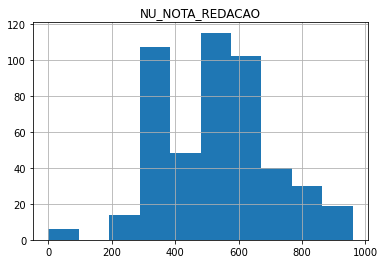

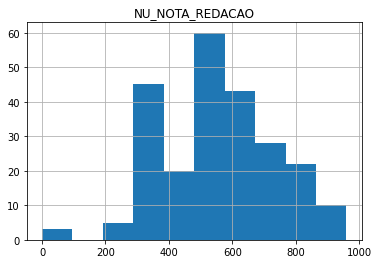

In [11]:
selected_columns_tp_sexo_and_nu_nota_redacao.groupby('TP_SEXO').hist()

Visualizando informações básicas do dataframe

In [12]:
selected_columns_tp_sexo_and_nu_nota_redacao.groupby('TP_SEXO').describe()

NU_NOTA_REDACAO                          ...                     
                  count        mean         std  ...    50%    75%    max
TP_SEXO                                          ...                     
F                 481.0  529.937630  174.666934  ...  540.0  640.0  960.0
M                 236.0  552.118644  176.810280  ...  550.0  680.0  960.0

[2 rows x 8 columns]

**Legenda**:

* **count**: quantidade.
* **mean**: média aritmética.
* **std**: desvio padrão.
* **min**: o mínimo.
* **25%**: distribuição por quartiz (25% abaixo e 75% acima).
* **50%**: mediana.
* **75%**: distribuição por quartiz (75% abaixo e 25% acima).
* **max**: o máximo.

*Para aprender mais sobre estatística básica da uma olhada [aqui](http://www.portalaction.com.br/estatistica-basica/23-quartis).*

## A questão **socioeconômica** influência na nota do enem?

**Questões do questionário utilizados para responder a pergunta**:
* Até que série seu pai ou homem responsável por você estudou?
* Até que série sua mãe ou mulher responsavel por você estudou?

**Possíveis respostas**:

(A) Nunca estudou.

(B) Não completou a 4ª série/5º ano do Ensino Fundamental.

(C) Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.

(D) Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.

(E) Completou o Ensino Médio, mas não completou a Faculdade.

(F) Completou a Faculdade, mas não completou a Pós-graduação.

(G) Completou a Pós-graduação.

(H) Não sei.

Filtrando dados do dataframe e limpando dados



In [14]:
selected_columns_for_socioeconomic_issues = data_enem.filter(items=['NU_INSCRICAO', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q001', 'Q002'])
selected_columns_for_socioeconomic_issues = selected_columns_for_socioeconomic_issues.dropna()
selected_columns_for_socioeconomic_issues.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
1,"1,80007E+11",480.3,280.0,B,B
5,"1,80007E+11",538.8,580.0,C,D
7,"1,80008E+11",733.8,680.0,A,E
8,"1,80008E+11",459.0,340.0,D,D
9,"1,80008E+11",525.4,740.0,C,C


### Definindo um dicionário para os dados

O dicionário será utilizado para visualizar melhor as informações que serão analisados.

In [0]:
dictionary = {
    'A': 'Nunca estudou',
    'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental',
    'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
    'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio', 
    'E': 'Completou o Ensino Médio, mas não completou a Faculdade',
    'F': 'Completou a Faculdade, mas não completou a Pós-graduação',
    'G': 'Completou a Pós-graduação',
    'H': 'Não sei'
    }

Adicionando colunas dentro do dataframe atribuindo valores correspondentes com a coluna Q001 e a coluna Q002

In [19]:
selected_columns_for_socioeconomic_issues['NO_Q001'] = [dictionary[response] for response in selected_columns_for_socioeconomic_issues.Q001]
selected_columns_for_socioeconomic_issues['NO_Q002'] = [dictionary[response] for response in selected_columns_for_socioeconomic_issues.Q002]
selected_columns_for_socioeconomic_issues.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001,NO_Q002
1,"1,80007E+11",480.3,280.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...
5,"1,80007E+11",538.8,580.0,C,D,"Completou a 4ª série/5º ano, mas não completou...",Completou a 8ª série/9º ano do Ensino Fundamen...
7,"1,80008E+11",733.8,680.0,A,E,Nunca estudou,"Completou o Ensino Médio, mas não completou a ..."
8,"1,80008E+11",459.0,340.0,D,D,Completou a 8ª série/9º ano do Ensino Fundamen...,Completou a 8ª série/9º ano do Ensino Fundamen...
9,"1,80008E+11",525.4,740.0,C,C,"Completou a 4ª série/5º ano, mas não completou...","Completou a 4ª série/5º ano, mas não completou..."


### Comparando a distribuição do nível de escolaridade dos Pais e das Mães

Analisando dos pais

In [26]:
selected_columns_for_socioeconomic_issues.filter(items=['NU_INSCRICAO', 'NO_Q001']).groupby('NO_Q001').count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
NO_Q001,
Não completou a 4ª série/5º ano do Ensino Fundamental,180
"Completou o Ensino Médio, mas não completou a Faculdade",167
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",101
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",86
Não sei,73
Nunca estudou,40
"Completou a Faculdade, mas não completou a Pós-graduação",28
Completou a Pós-graduação,5


Analisando a escolaridade das mães

In [27]:
selected_columns_for_socioeconomic_issues.filter(items=['NU_INSCRICAO', 'NO_Q002']).groupby('NO_Q002').count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
NO_Q002,
"Completou o Ensino Médio, mas não completou a Faculdade",239
Não completou a 4ª série/5º ano do Ensino Fundamental,151
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",96
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",91
"Completou a Faculdade, mas não completou a Pós-graduação",52
Completou a Pós-graduação,21
Não sei,16
Nunca estudou,14


### Comparando o desempenho em **matemática** de acordo com o grau de escolaridade dos Pais e das Mães

Analisando dos pais

In [30]:
selected_columns_for_socioeconomic_issues.filter(items=['NU_NOTA_MT', 'NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_MT', ascending=False)

,NU_NOTA_MT
NO_Q001,
"Completou a Faculdade, mas não completou a Pós-graduação",588.646429
Completou a Pós-graduação,571.740000
Nunca estudou,544.710000
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",543.324419
"Completou o Ensino Médio, mas não completou a Faculdade",538.620359
Não sei,538.610959
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",520.065347
Não completou a 4ª série/5º ano do Ensino Fundamental,504.322778


Analisando das mães

In [31]:
selected_columns_for_socioeconomic_issues.filter(items=['NU_NOTA_MT', 'NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_MT', ascending=False)

,NU_NOTA_MT
NO_Q002,
"Completou a Faculdade, mas não completou a Pós-graduação",564.450000
Não sei,544.318750
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",535.316484
"Completou o Ensino Médio, mas não completou a Faculdade",534.740167
Completou a Pós-graduação,533.052381
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",524.981250
Não completou a 4ª série/5º ano do Ensino Fundamental,511.431126
Nunca estudou,502.314286


### Comparando o desempenho em **Redação** de acordo com o grau de escolaridade dos Pais e das Mães

Analisando dos pais

In [32]:
selected_columns_for_socioeconomic_issues.filter(items=['NU_NOTA_REDACAO', 'NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
NO_Q001,
Completou a Pós-graduação,716.000000
"Completou a Faculdade, mas não completou a Pós-graduação",616.428571
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",588.372093
Nunca estudou,575.500000
"Completou o Ensino Médio, mas não completou a Faculdade",568.622754
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",557.623762
Não sei,532.876712
Não completou a 4ª série/5º ano do Ensino Fundamental,471.666667


Analisando das mães

In [33]:
selected_columns_for_socioeconomic_issues.filter(items=['NU_NOTA_REDACAO', 'NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
NO_Q002,
"Completou a Faculdade, mas não completou a Pós-graduação",612.307692
Completou a Pós-graduação,605.714286
"Completou o Ensino Médio, mas não completou a Faculdade",561.506276
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",558.901099
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",525.625000
Não sei,521.250000
Nunca estudou,514.285714
Não completou a 4ª série/5º ano do Ensino Fundamental,489.536424


### Verificando graficamente as informações

Comparando desempenho em matemática com a escolaridade dos pais

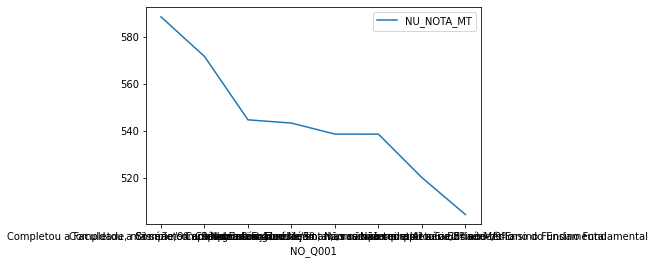

In [43]:
selection_of_grades_by_fathers_schooling = selected_columns_for_socioeconomic_issues.filter(items=['NU_NOTA_MT', 'NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_MT', ascending=False)
selection_of_grades_by_fathers_schooling.plot()

In [46]:
selection_of_grades_by_fathers_schooling = selected_columns_for_socioeconomic_issues.filter(items=['NU_NOTA_MT', 'NO_Q001']).groupby('NO_Q001')
selection_of_grades_by_fathers_schooling.describe()

NU_NOTA_MT  ...       
                                                        count  ...    max
NO_Q001                                                        ...       
Completou a 4ª série/5º ano, mas não completou ...      101.0  ...  777.6
Completou a 8ª série/9º ano do Ensino Fundament...       86.0  ...  817.4
Completou a Faculdade, mas não completou a Pós-...       28.0  ...  890.2
Completou a Pós-graduação                                 5.0  ...  703.9
Completou o Ensino Médio, mas não completou a F...      167.0  ...  793.3
Nunca estudou                                            40.0  ...  733.8
Não completou a 4ª série/5º ano do Ensino Funda...      180.0  ...  754.9
Não sei                                                  73.0  ...  758.4

[8 rows x 8 columns]

Comparando desempenho em matemática com a escolaridade das mães

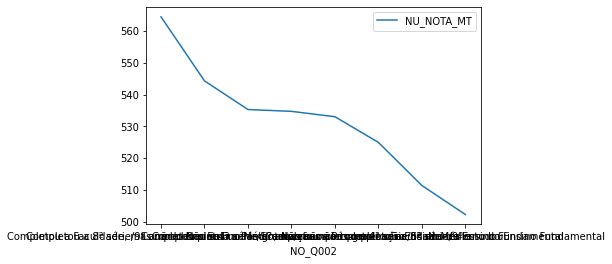

In [44]:
selection_of_grades_by_mothers_schooling = selected_columns_for_socioeconomic_issues.filter(items=['NU_NOTA_MT', 'NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_MT', ascending=False)
selection_of_grades_by_mothers_schooling.plot()

In [47]:
selection_of_grades_by_mothers_schooling = selected_columns_for_socioeconomic_issues.filter(items=['NU_NOTA_MT', 'NO_Q002']).groupby('NO_Q002')
selection_of_grades_by_mothers_schooling.describe()

NU_NOTA_MT  ...       
                                                        count  ...    max
NO_Q002                                                        ...       
Completou a 4ª série/5º ano, mas não completou ...       96.0  ...  817.4
Completou a 8ª série/9º ano do Ensino Fundament...       91.0  ...  793.3
Completou a Faculdade, mas não completou a Pós-...       52.0  ...  783.9
Completou a Pós-graduação                                21.0  ...  762.7
Completou o Ensino Médio, mas não completou a F...      239.0  ...  890.2
Nunca estudou                                            14.0  ...  710.9
Não completou a 4ª série/5º ano do Ensino Funda...      151.0  ...  752.0
Não sei                                                  16.0  ...  650.4

[8 rows x 8 columns]

Comparando desempenho na redação com a escolaridade dos pais

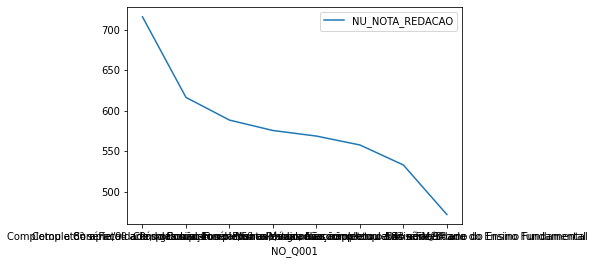

In [48]:
selection_of_grades_by_fathers_schooling = selected_columns_for_socioeconomic_issues.filter(items=['NU_NOTA_REDACAO', 'NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)
selection_of_grades_by_fathers_schooling.plot()

In [53]:
selection_of_grades_by_fathers_schooling = selected_columns_for_socioeconomic_issues.filter(items=['NU_NOTA_REDACAO', 'NO_Q001']).groupby('NO_Q001')
selection_of_grades_by_fathers_schooling.describe()

NU_NOTA_REDACAO  ...       
                                                             count  ...    max
NO_Q001                                                             ...       
Completou a 4ª série/5º ano, mas não completou ...           101.0  ...  960.0
Completou a 8ª série/9º ano do Ensino Fundament...            86.0  ...  960.0
Completou a Faculdade, mas não completou a Pós-...            28.0  ...  920.0
Completou a Pós-graduação                                      5.0  ...  900.0
Completou o Ensino Médio, mas não completou a F...           167.0  ...  960.0
Nunca estudou                                                 40.0  ...  960.0
Não completou a 4ª série/5º ano do Ensino Funda...           180.0  ...  920.0
Não sei                                                       73.0  ...  920.0

[8 rows x 8 columns]

Comparando desempenho na redação com a escolaridade das mães

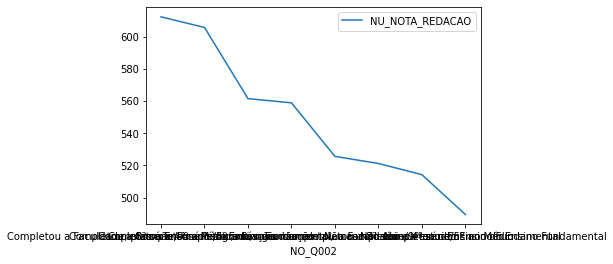

In [55]:
selection_of_grades_by_mothers_schooling = selected_columns_for_socioeconomic_issues.filter(items=['NU_NOTA_REDACAO', 'NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)
selection_of_grades_by_mothers_schooling.plot()

In [56]:
selection_of_grades_by_mothers_schooling = selected_columns_for_socioeconomic_issues.filter(items=['NU_NOTA_REDACAO', 'NO_Q002']).groupby('NO_Q002')
selection_of_grades_by_mothers_schooling.describe()

NU_NOTA_REDACAO  ...       
                                                             count  ...    max
NO_Q002                                                             ...       
Completou a 4ª série/5º ano, mas não completou ...            96.0  ...  960.0
Completou a 8ª série/9º ano do Ensino Fundament...            91.0  ...  960.0
Completou a Faculdade, mas não completou a Pós-...            52.0  ...  920.0
Completou a Pós-graduação                                     21.0  ...  860.0
Completou o Ensino Médio, mas não completou a F...           239.0  ...  960.0
Nunca estudou                                                 14.0  ...  820.0
Não completou a 4ª série/5º ano do Ensino Funda...           151.0  ...  960.0
Não sei                                                       16.0  ...  740.0

[8 rows x 8 columns]

# Rodapé
> A "pulo do gato" da análise está nas perguntas que fazemos.

